# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Prepared data

In [2]:
avg_wb = pd.read_csv("Consumption_Climate_Average_West_Bengal_2018_2019_2020.csv")
avg_wb["Date"] = pd.to_datetime(avg_wb["Date"])
avg_wb.set_index("Date", inplace = True)
avg_wb.drop("avg_temp", axis = 1, inplace = True)
avg_wb.head()

,Consumption,avg_max,avg_min,avg_rain
Date,,,,
2018-01-01,87.3,23.775773,11.385371,0.0
2018-01-02,87.9,23.422979,11.027654,0.0
2018-01-03,92.1,21.428075,10.351028,0.0
2018-01-04,96.6,20.518272,9.465577,0.0
2018-01-05,98.5,21.488783,8.556001,0.0


In [3]:
avg_wb.corr()

,Consumption,avg_max,avg_min,avg_rain
Consumption,1.000000,0.774386,0.803968,0.222968
avg_max,0.774386,1.000000,0.882739,0.198494
avg_min,0.803968,0.882739,1.000000,0.451281
avg_rain,0.222968,0.198494,0.451281,1.000000


# Visualization

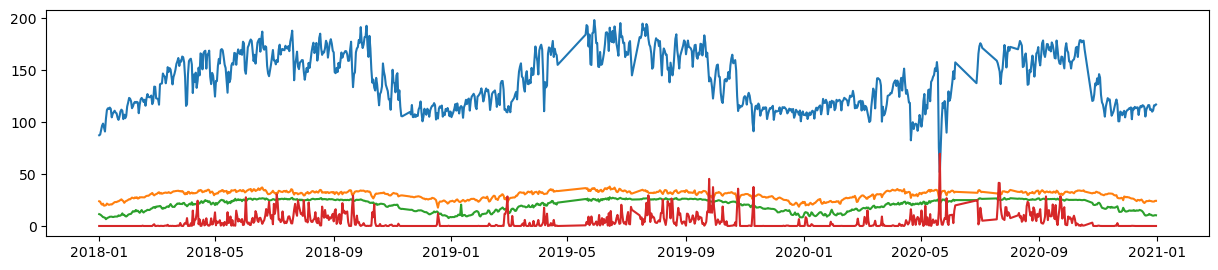

In [4]:
plt.figure(figsize = (15, 3), dpi = 100)
# avg_wb.plot()
plt.plot(avg_wb.index, avg_wb["Consumption"])
plt.plot(avg_wb.index, avg_wb["avg_max"])
plt.plot(avg_wb.index, avg_wb["avg_min"])
plt.plot(avg_wb.index, avg_wb["avg_rain"])
# plt.plot(avg_wb.index, avg_wb["avg_temp"])

# Regressions

In [45]:
train = avg_wb.loc[:"2020-06-30"]
test = avg_wb.loc["2020-07-01":]

In [46]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(850, 4)
(850,)
(155, 4)
(155,)


In [5]:
X = avg_wb.iloc[:, 1:]
y = avg_wb.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, shuffle = False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(854, 3)
(854,)
(151, 3)
(151,)


In [6]:
X_train

,avg_max,avg_min,avg_rain
Date,,,
2018-01-01,23.775773,11.385371,0.000000
2018-01-02,23.422979,11.027654,0.000000
2018-01-03,21.428075,10.351028,0.000000
2018-01-04,20.518272,9.465577,0.000000
2018-01-05,21.488783,8.556001,0.000000
...,...,...,...
2020-06-30,34.228436,25.740313,1.509093
2020-07-01,34.503356,26.593885,4.869161
2020-07-02,33.657682,26.532406,17.498363


In [7]:
X_test

,avg_max,avg_min,avg_rain
Date,,,
2020-07-19,31.330984,26.511639,6.405221
2020-07-20,30.914166,25.204170,20.146829
2020-07-21,31.944268,25.622846,41.550998
2020-07-22,30.905625,25.153537,41.269398
2020-07-23,30.512779,25.022610,18.145881
...,...,...,...
2020-12-27,23.572216,10.109815,0.000000
2020-12-28,23.569913,9.930083,0.000000
2020-12-29,23.504397,10.118490,0.000000


# OLS

In [8]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            Consumption   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          2.227e+04
Date:                Thu, 08 Sep 2022   Prob (F-statistic):                        0.00
Time:                        01:31:20   Log-Likelihood:                         -3572.9
No. Observations:                 854   AIC:                                      7152.
Df Residuals:                     851   BIC:                                      7166.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
y_ols = res.predict(X_test)
r2_score(y_test, y_ols)

0.7520923073087513

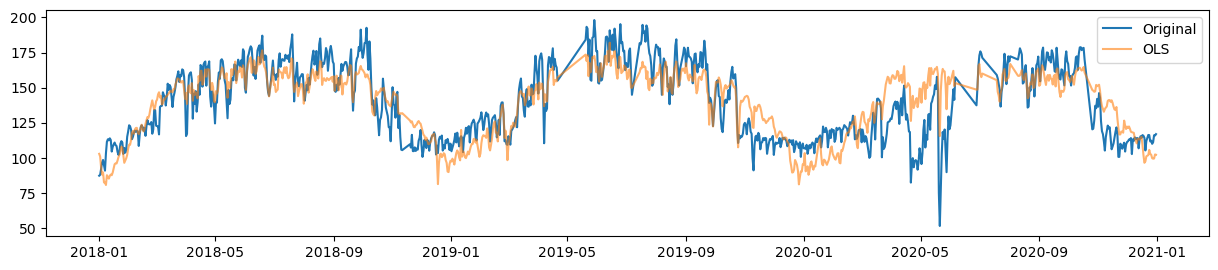

In [10]:
plt.figure(figsize = (15, 3), dpi = 100)
plt.plot(X.index, y, label = "Original")
plt.plot(X.index, res.predict(X), alpha = 0.6, label = "OLS")
plt.legend()

In [11]:
res.params

avg_max     3.419275
avg_min     1.894811
avg_rain   -0.322098
dtype: float64

# Lasso

In [12]:
lasso = Lasso().fit(X_train, y_train)

In [13]:
y_lasso = lasso.predict(X_test)
r2_score(y_test, y_lasso)

0.7710957337674748

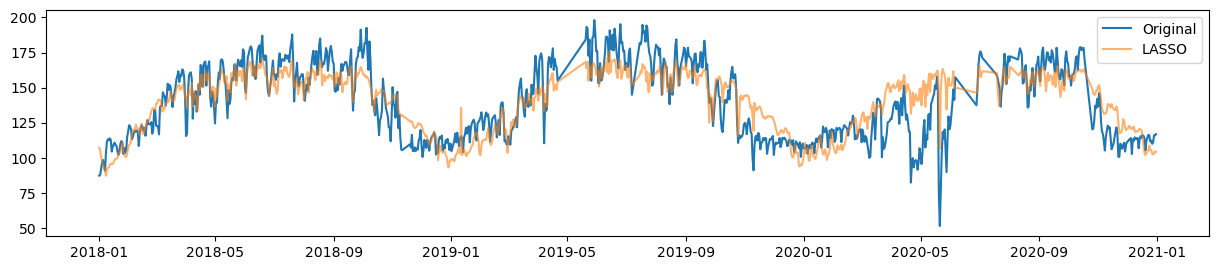

In [14]:
plt.figure(figsize = (15, 3), dpi = 100)
plt.plot(X.index, y, label = "Original")
plt.plot(X.index, lasso.predict(X), alpha = 0.6, label = "LASSO")
plt.legend()

In [15]:
lasso.coef_

array([ 1.27615834,  3.10986522, -0.54277067])

# Ridge

In [16]:
ridge = Ridge().fit(X_train, y_train)

In [17]:
y_ridge = ridge.predict(X_test)
r2_score(y_test, y_ridge)

0.7699841482465102

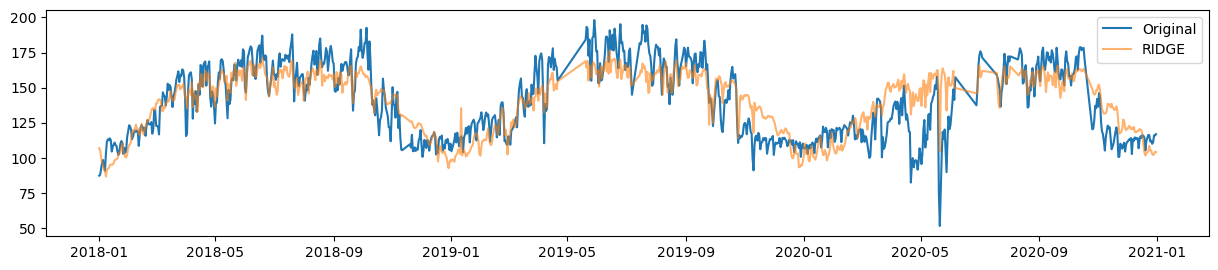

In [18]:
plt.figure(figsize = (15, 3), dpi = 100)
plt.plot(X.index, y, label = "Original")
plt.plot(X.index, ridge.predict(X), alpha = 0.6, label = "RIDGE")
plt.legend()

In [20]:
ridge.coef_

array([ 1.32663098,  3.12582406, -0.57575988])

# Random Forest Regressor

In [31]:
rand_reg = RandomForestRegressor().fit(X_train, y_train)

In [32]:
y_rand_reg = rand_reg.predict(X_test)
r2_score(y_test, y_rand_reg)

0.8712428295390001

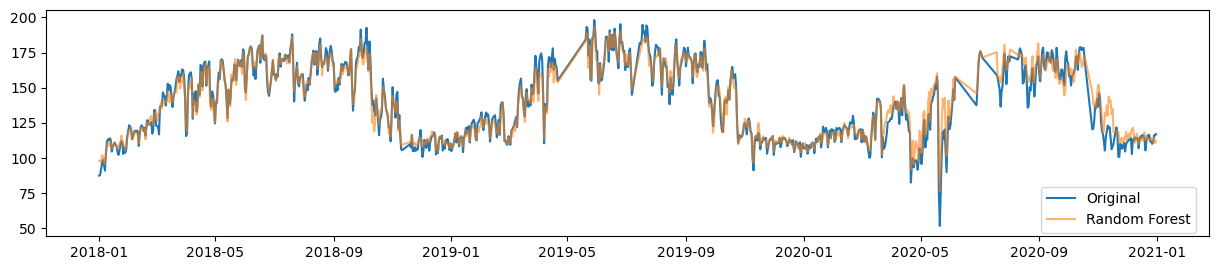

In [36]:
plt.figure(figsize = (15, 3), dpi = 100)
plt.plot(X.index, y, label = "Original")
plt.plot(X.index, rand_reg.predict(X), alpha = 0.6, label = "Random Forest")
plt.legend(bbox_to_anchor = [.85, .25])

In [25]:
rand_reg.feature_importances_

array([0.47768078, 0.45217094, 0.07014828])

# Comparison

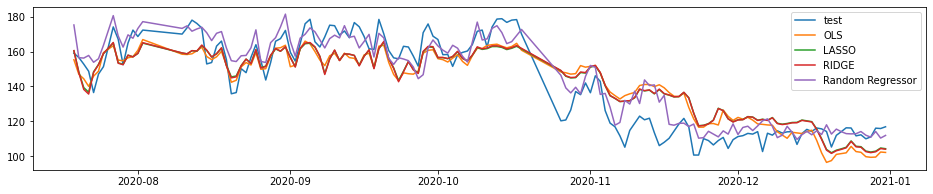

In [37]:
plt.figure(figsize = (16, 3))
plt.plot(X_test.index, y_test, label = "test")
plt.plot(X_test.index, y_ols, label = "OLS")
plt.plot(X_test.index, y_lasso, label = "LASSO")
plt.plot(X_test.index, y_ridge, label = "RIDGE")
plt.plot(X_test.index, y_rand_reg, label = "Random Regressor")
plt.legend()

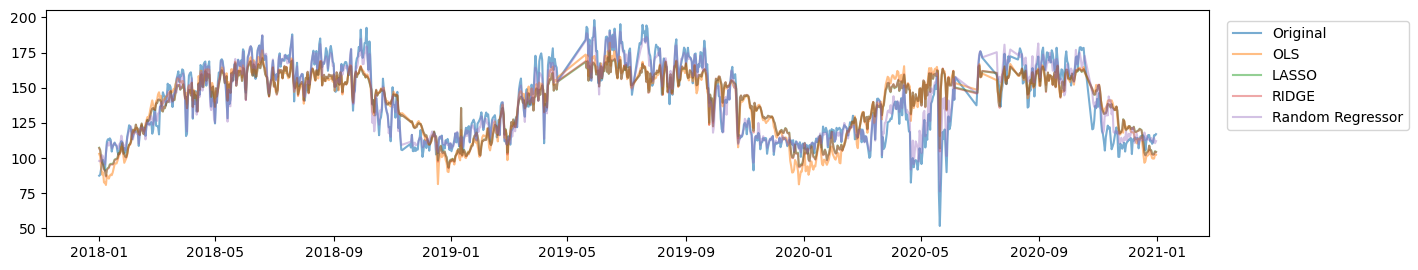

In [38]:
plt.figure(figsize = (15, 3), dpi = 100)
plt.plot(X.index, y, alpha = 0.6, label = "Original")
plt.plot(X.index, res.predict(X), alpha = 0.5, label = "OLS")
plt.plot(X.index, lasso.predict(X), alpha = 0.5, label = "LASSO")
plt.plot(X.index, ridge.predict(X), alpha = 0.4, label = "RIDGE")
plt.plot(X.index, rand_reg.predict(X), alpha = 0.4, label = "Random Regressor")
plt.legend(bbox_to_anchor = (1.01, 0.98))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

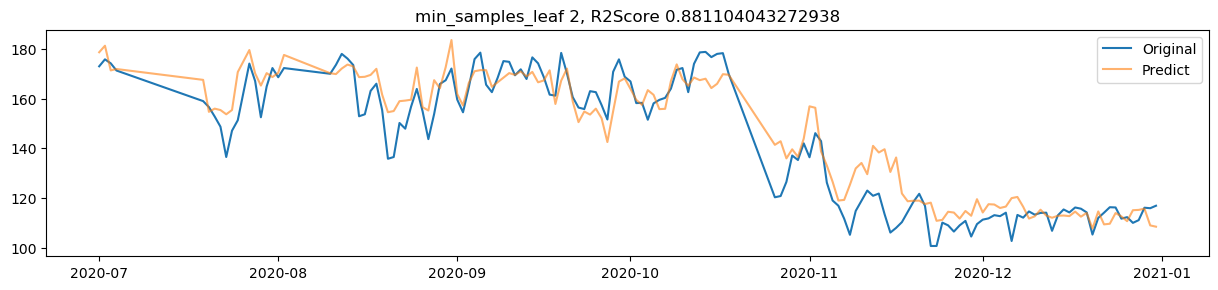

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

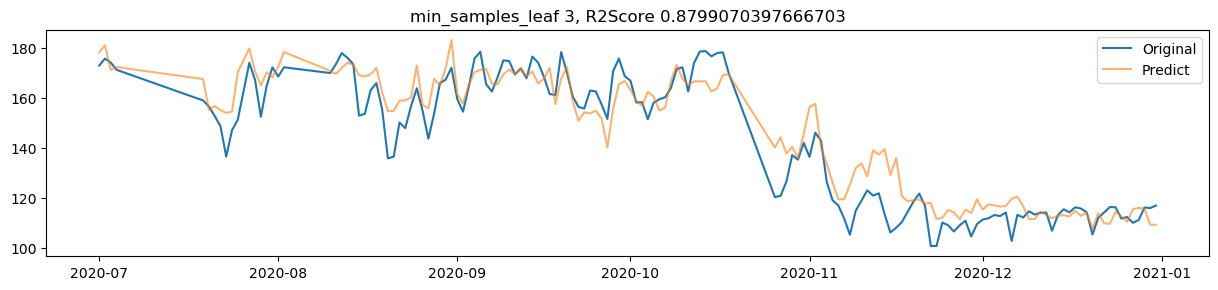

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

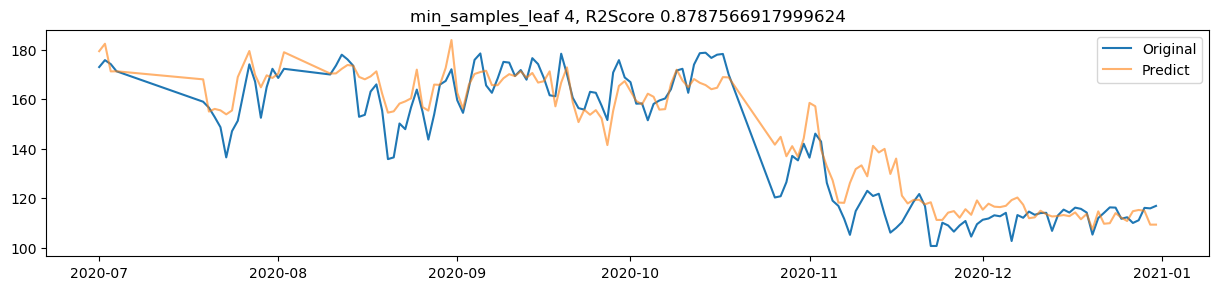

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

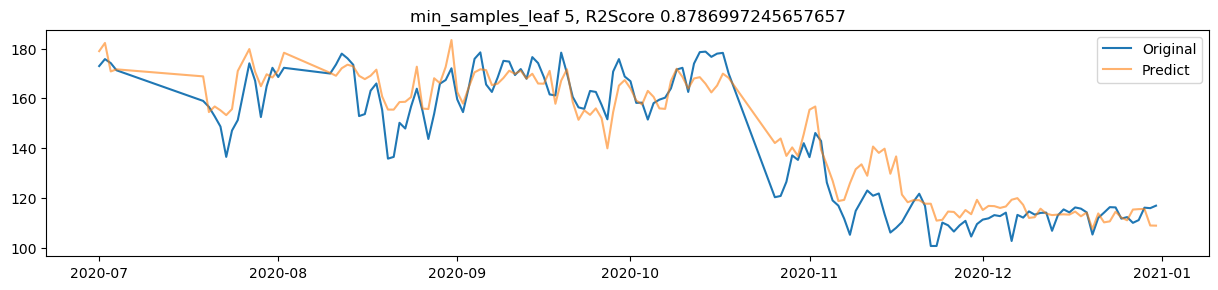

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

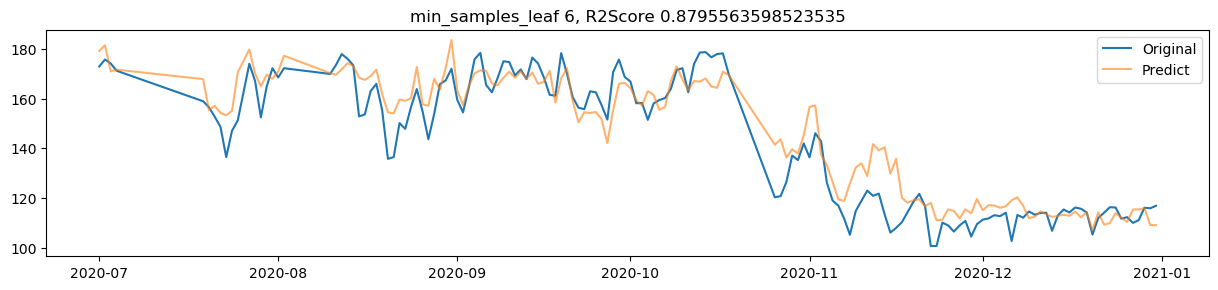

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

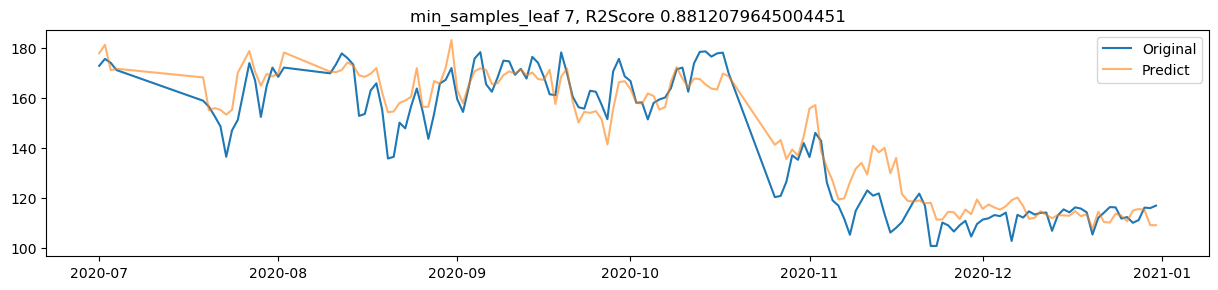

In [67]:
for i in range(2, 8):
    ran_re = RandomForestRegressor(n_estimators=200, min_samples_leaf=3).fit(X_train, y_train)
    plt.figure(figsize = (15, 3), dpi = 100)
    plt.plot(X_test.index, y_test, label = "Original")
    plt.plot(X_test.index, ran_re.predict(X_test), alpha = 0.6, label = "Predict")
    plt.title(f"min_samples_leaf {i}, R2Score {r2_score(y_test, ran_re.predict(X_test))}")
    plt.legend()
    plt.show()

In [68]:
r2_score(y_test, ran_re.predict(X_test))

0.8812079645004451

In [1]:
# a documentation

In [ ]:
# current Prediction

In [41]:
new_kol = pd.read_csv("22-08_28-08_climate.csv")
new_kol["Date"] = pd.to_datetime(new_kol["Date"], )
new_kol.set_index("Date", inplace = True)
new_kol

<ipython-input-41-f80827fd25c1>:2: UserWarning: Parsing '22-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_kol["Date"] = pd.to_datetime(new_kol["Date"], )
<ipython-input-41-f80827fd25c1>:2: UserWarning: Parsing '23-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_kol["Date"] = pd.to_datetime(new_kol["Date"], )
<ipython-input-41-f80827fd25c1>:2: UserWarning: Parsing '24-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_kol["Date"] = pd.to_datetime(new_kol["Date"], )
<ipython-input-41-f80827fd25c1>:2: UserWarning: Parsing '25-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_kol["Date"] = pd.to_datetime(new_kol["Date"], )
<ipython-input-41-f80827fd25c1>:2: UserWarning: Parsing '26-08-2022' in DD/MM/YYYY format. Provide format or spe

,max_temp,min_temp,rain
Date,,,
2022-08-22,35,27,0.5
2022-08-23,31,27,0.7
2022-08-24,31,26,4.9
2022-08-25,32,26,0.2
2022-08-26,34,26,0.1
2022-08-27,34,27,0.1
2022-08-28,32,27,2.6


In [43]:
en_kol = pd.read_csv("22-08_28-08_energy.csv")
en_kol["Date"] = pd.to_datetime(en_kol["Date"], )
en_kol.set_index("Date", inplace = True)
en_kol

<ipython-input-43-51f68002a4ca>:2: UserWarning: Parsing '22-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  en_kol["Date"] = pd.to_datetime(en_kol["Date"], )
<ipython-input-43-51f68002a4ca>:2: UserWarning: Parsing '23-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  en_kol["Date"] = pd.to_datetime(en_kol["Date"], )
<ipython-input-43-51f68002a4ca>:2: UserWarning: Parsing '24-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  en_kol["Date"] = pd.to_datetime(en_kol["Date"], )
<ipython-input-43-51f68002a4ca>:2: UserWarning: Parsing '25-08-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  en_kol["Date"] = pd.to_datetime(en_kol["Date"], )
<ipython-input-43-51f68002a4ca>:2: UserWarning: Parsing '26-08-2022' in DD/MM/YYYY format. Provide format or specify inf

,Consumption
Date,
2022-08-22,187.9
2022-08-23,182.2
2022-08-24,172.9
2022-08-25,178.4
2022-08-26,191.5
2022-08-27,193.7
2022-08-28,176.8


In [ ]:
# From OLS

In [44]:
kol_ols = res.predict(new_kol)
kol_ols

Date
2022-08-22    170.673468
2022-08-23    156.931949
2022-08-24    153.684328
2022-08-25    158.617461
2022-08-26    165.488221
2022-08-27    167.383032
2022-08-28    159.739238
dtype: float64

In [45]:
r2_score(en_kol, kol_ols)

-8.01743650104983

In [ ]:
# lasso

In [48]:
kol_lasso = lasso.predict(new_kol)
kol_lasso

array([169.82533784, 164.61215036, 159.22264832, 163.04982881,
       165.65642256, 168.76628777, 164.85704442])

In [51]:
r2_score(en_kol, kol_lasso)

-5.692883504811758

In [ ]:
# ridge

In [52]:
kol_ridge = ridge.predict(new_kol)
kol_ridge

array([170.31055597, 164.88888009, 159.34486452, 163.37756694,
       166.08840488, 169.21422895, 165.12156729])

In [53]:
r2_score(en_kol, kol_ridge)

-5.448989664634932

In [ ]:
# random

In [54]:
kol_rand_reg = rand_reg.predict(new_kol)
kol_rand_reg

array([185.372, 170.473, 168.896, 166.011, 173.713, 180.981, 175.55 ])

In [55]:
r2_score(en_kol, kol_rand_reg)

-1.1310966974252068